# Chapter 5

Exercise 3

In [2]:
##a## How K-Fold cross validation is implemented
# We randomly divide the set of observations in k groups of equal size, The first k groups is treated as a validation set and 
#the rest of the groups (or folds) are treated as a training set. We do this k times and each time  we treat the other k group
#as a validation set. After doing this procedure, we get k times the MSE, and we get the average MSE by dividing all the MSEs
#by k.

##b## advantages and disadvantages
#i# The validation set approach:
# easy to implement but the MSE in the validation set can be highly variable and only a subset of obervations is used to train the data
#ii# LOOCV
# Has less bias but intensive computation since k=n

Exercise 8

In [5]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm(100)


[1]  -2.03170924   0.15830946  -3.14310062  -3.33653210  -0.54222762
  [6]  -0.39951785   0.72896237   0.55825219   0.29691838   1.19026356
 [11]  -3.69491989  -0.37575699   0.03916194 -12.67518742  -1.61338897
 [16]  -0.44177960  -0.33670738  -1.11693068  -0.03339898  -0.28886672
 [21]  -1.27601891   0.90170074  -0.15113430 -10.08394857  -0.24873291
 [26]   0.65023670  -0.27790439  -5.83461170  -1.61706548  -0.25567901
 [31]  -2.27318026  -0.71281285   0.61858925  -1.57798909  -4.86308774
 [36]  -2.29588536  -1.00619522  -0.59462946  -1.97218105  -0.45859548
 [41]  -2.13301905   0.79483735  -1.93952495  -0.52661504  -2.75344461
 [46]  -2.45941295   2.18590849  -0.39535717  -1.42389009  -2.31219946
 [51]   0.53131640  -1.37973884  -0.20967397  -4.60964725  -4.16155047
 [56]  -6.93875991   0.36310410  -3.84583556  -1.46386813   1.69775653
 [61]  -8.70881760  -0.28096666   0.79674163   0.91285657  -2.46742638
 [66]   2.32360970  -8.57573696  -4.25464189  -0.03811944  -7.06033293
 [71]   2.33126930  -1.61219193   0.32175180  -2.75632734  -4.73082765
 [76]   0.08683839  -0.04866764   2.07634792   1.09068050  -0.07668244
 [81]  -2.44676041   0.81217044  -1.37776614  -7.63332842   0.40942478
 [86]  -0.04751613   0.26732462  -1.25532164  -0.33402078  -0.80169423
 [91]  -1.30827996  -1.30800969  -2.26441402   0.54998851  -4.65733016
 [96]  -1.11331216  -3.09480984  -2.24637935  -3.81199002  -1.30269301

(a)
n is equal to 100 (number of observations) and p = 2 which is the variables x and y.
Y=X−2X^2+ε.

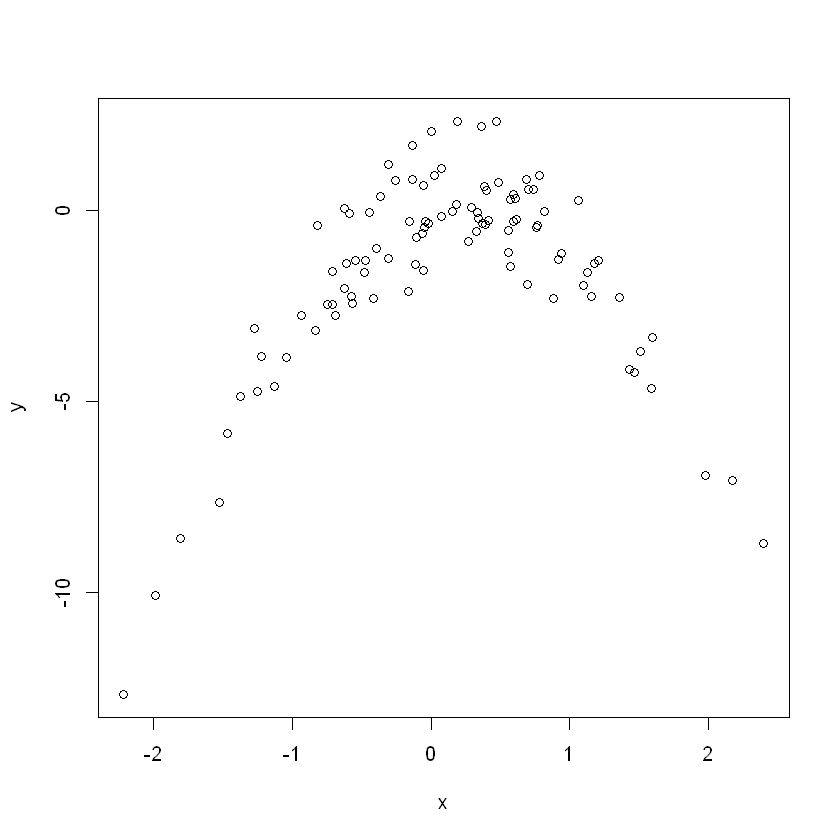

In [6]:
#b#
plot(x,y)

There is a curved relationshop between x and y

In [17]:
#c#
##i##
library(boot)
set.seed(1)
dat <- data.frame(x, y)
fit1 <- glm(y ~ x)
cv.glm(Data, fit1)$delta[1]

[1] 7.288162

In [19]:
##ii##
fit2 <- glm(y ~ poly(x, 2))
cv.glm(Data, fit2)$delta[1]

[1] 0.9374236

In [20]:
##iii##
fit3 <- glm(y ~ poly(x, 3))
cv.glm(Data, fit3)$delta[1]

[1] 0.9566218

In [21]:
##iv##
fit4 <- glm(y ~ poly(x, 4))
cv.glm(Data, fit4)$delta[1]

[1] 0.9539049

In [24]:
#d#
set.seed(10)
fit1 <- glm(y ~ x)
cv.glm(Data, fit1)$delta[1]

[1] 7.288162

In [25]:
fit2 <- glm(y ~ poly(x, 2))
cv.glm(Data, fit2)$delta[1]

[1] 0.9374236

In [26]:
fit3 <- glm(y ~ poly(x, 3))
cv.glm(Data, fit3)$delta[1]

[1] 0.9566218

In [27]:
fit4 <- glm(y ~ poly(x, 4))
cv.glm(Data, fit4)$delta[1]

[1] 0.9539049

We got the same results from the difference seeds set, and the reason why is that for LOOCV k=n

In [ ]:
#e#
The smallest error was in fit2

# Chapter 7

Exercise 9

In [31]:
#a#
library(MASS)
fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


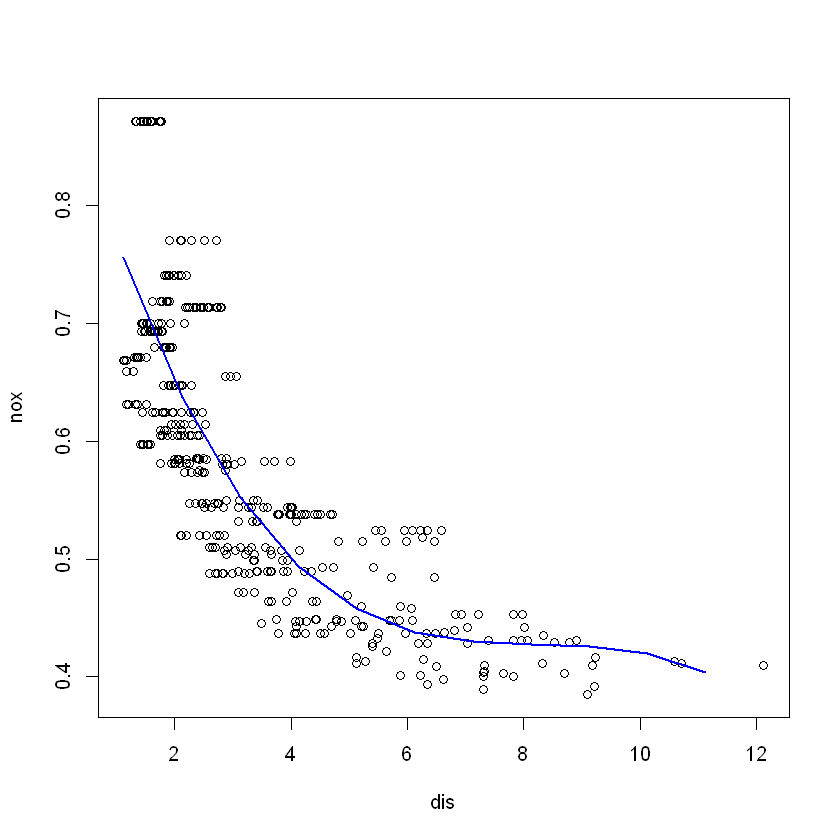

In [37]:
dis.grid <- seq(min(Boston$dis), max(Boston$dis))
preds <- predict(fit, list(dis = dis.grid), se = TRUE)
plot(nox ~ dis, data = Boston)
lines(dis.grid, preds$fit, lwd = 2, col = "blue")

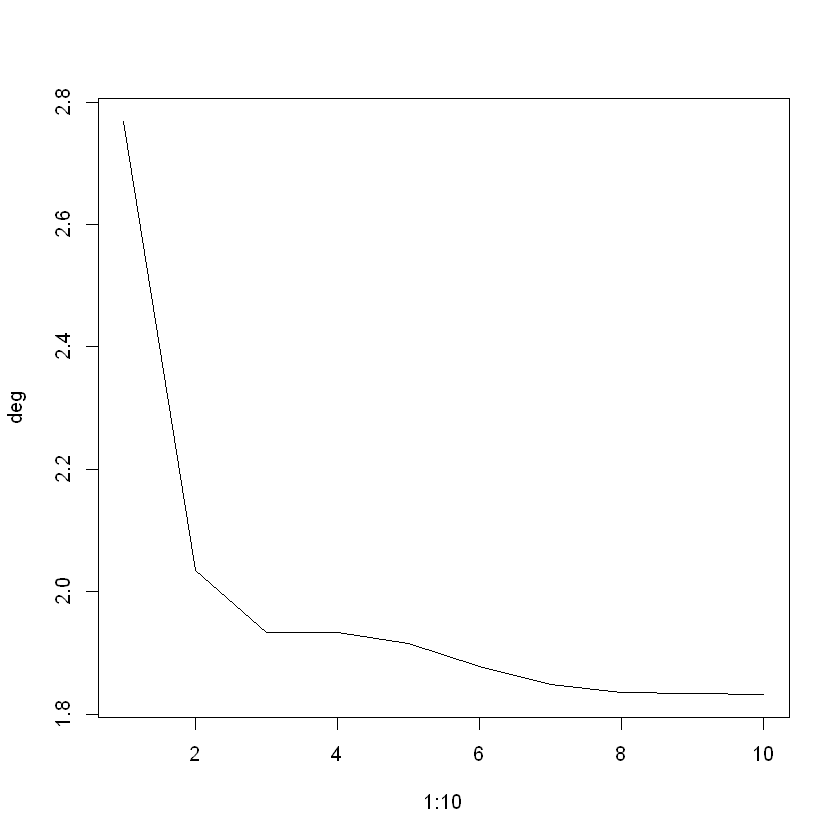

In [39]:
#b#
#we created a set called deg that contains the 10 degrees and we created a loop as follows: 
deg <- rep(NA, 10)
for (i in 1:10) {
  fit2 <- lm(nox ~ poly(dis, i), data = Boston)
  deg[i] <- sum(fit2$residuals ^ 2)
}
plot(1:10, deg, type = 'l')

In [40]:
#d#
library(splines)
df <- 4
fit4 <- lm(nox ~ bs(dis, df = df ), data = Boston)
attr(bs(Boston$dis, df = df), "knots")

50% 
3.20745

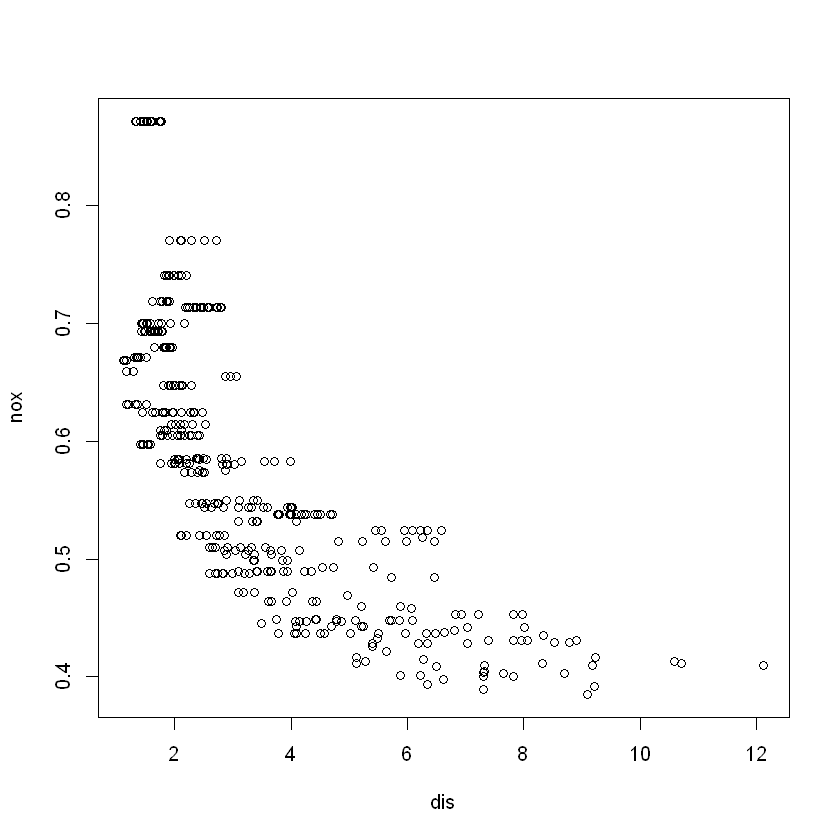

In [44]:
dis.grid <- seq(min(Boston$dis), max(Boston$dis))
preds <- predict(fit4, list(dis = dis.grid), se = TRUE)
plot(nox ~ dis, data = Boston)
lines(dis.grid, preds$fit4, lwd = 2, col = "blue")

In [51]:
#e#
deg2 <- c()
df <- 3:10
for (dof in df) {
  fit <- lm(nox ~ bs(dis, df = dof), data = Boston)
  res <- c(deg2, sum(fit$residuals ^ 2))
}
plot(df, res, type = 'l')

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ
